In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [2]:
from  sklearn.model_selection import train_test_split

In [3]:
sns.set(style="darkgrid", color_codes=True)

In [4]:
path=r"/Users/nicolo/Desktop/Uni_project/pid-5M.csv"

In [5]:
dataSET=pd.read_csv(path)

In [6]:
dataSET

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
4999995,211,0.835889,0.495847,0.975812,0,0.000000,0.046967
4999996,211,2.027470,0.287966,1.222890,0,0.197894,0.186404
4999997,211,0.827497,0.689746,0.980957,0,0.000000,0.000000
4999998,2212,1.331200,0.382746,0.811818,0,0.036942,0.056947


In [7]:
data=dataSET.head(50000)
data

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...,...
49995,211,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,2212,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,211,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,211,0.913405,0.454171,1.000300,0,0.026596,0.000000


In [8]:
y=data.id
y.unique()

array([ 211, 2212,  321,  -11])

In [9]:
y[0]

211

In [10]:
y

0         211
1         211
2        2212
3         211
4        2212
         ... 
49995     211
49996    2212
49997     211
49998     211
49999     211
Name: id, Length: 50000, dtype: int64

In [11]:
for i in range(0,50000):
    if y[i]==211:
       y[i]=0
    else:
       y[i]=1

/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_911/823603527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=0
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_911/823603527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1


In [12]:
y.unique()

array([0, 1])

In [13]:
y

0        0
1        0
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: id, Length: 50000, dtype: int64

In [14]:
df=data.drop(['id'],axis=1)

In [15]:
np.unique(y,return_counts = True)

(array([0, 1]), array([27974, 22026]))

In [16]:
dt=pd.concat((df,y),axis=1)

In [17]:
dt

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
...,...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000,1
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [18]:
df_0 = dt[dt.id == abs(0)]
df_0

,p,theta,beta,nphe,ein,eout,id
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,0
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,0
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,0
5,0.403296,0.694215,0.958553,0,0.000000,0.000000,0
10,0.612497,0.809353,0.982344,0,0.000000,0.000000,0
...,...,...,...,...,...,...,...
49994,1.059890,0.316029,1.004300,0,0.032639,0.052415,0
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577,0
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749,0
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000,0


In [19]:
df_1=dt[dt.id==abs(1)]
df_1

,p,theta,beta,nphe,ein,eout,id
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,1
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,1
6,1.382620,0.436689,0.844835,0,0.200275,0.053651,1
7,1.133130,0.276831,0.781295,0,0.044038,0.093980,1
8,0.656291,0.542507,0.560291,0,0.083406,0.000000,1
...,...,...,...,...,...,...,...
49988,0.599832,0.525916,0.770316,0,0.000000,0.000000,1
49989,1.421840,0.456268,0.831724,0,0.028061,0.225727,1
49990,1.643850,0.332099,0.885782,0,0.146212,0.044724,1
49993,1.361720,0.351195,0.816579,0,0.043763,0.068574,1


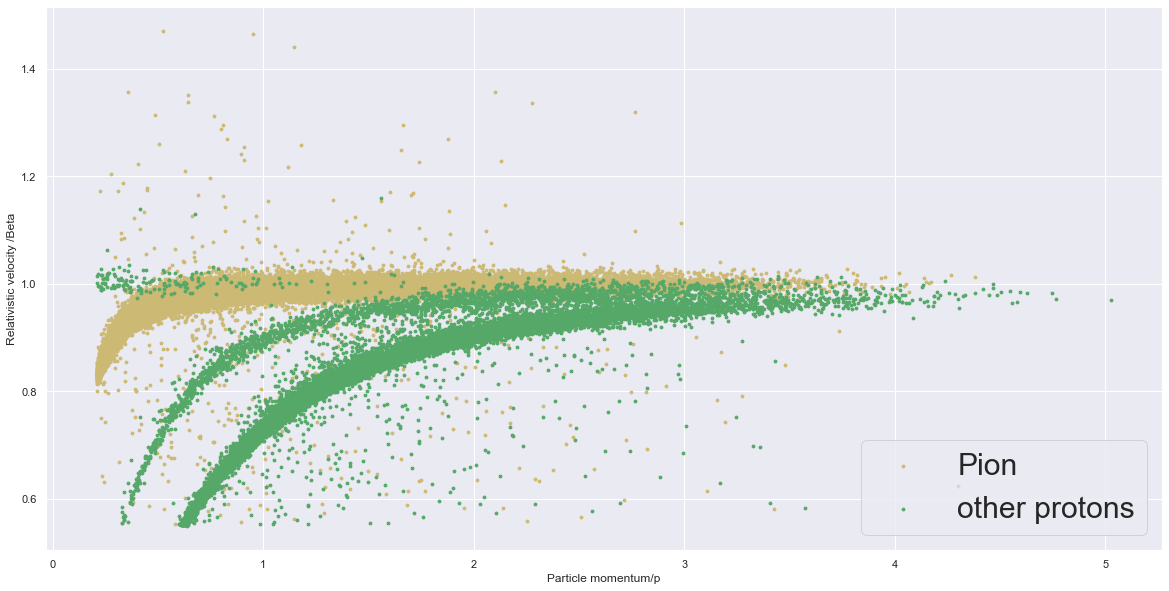

In [20]:
plt.subplots(figsize=(20,10))
plt.scatter(df_0.p,df_0.beta,color='y',s=8,label='Pion')
plt.scatter(df_1.p,df_1.beta,color='g',s=8,label='other protons')
plt.xlabel('Particle momentum/p')
plt.ylabel('Relativistic velocity /Beta')
plt.legend(loc="lower right", fontsize=30)

In [21]:
y=dt.id
x=dt.drop('id',axis=1)

In [22]:
x

,p,theta,beta,nphe,ein,eout
0,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2.123290,0.337332,0.908652,0,0.034379,0.049256
...,...,...,...,...,...,...
49995,1.205000,0.372458,0.988503,0,0.029572,0.049577
49996,0.899519,0.685490,0.701149,0,0.000000,0.000000
49997,2.112610,0.177894,0.996632,0,0.027283,0.041749
49998,0.913405,0.454171,1.000300,0,0.026596,0.000000


In [23]:
y

0        0
1        0
2        1
3        0
4        1
        ..
49995    0
49996    1
49997    0
49998    0
49999    0
Name: id, Length: 50000, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [26]:
x_train.head(10)

,p,theta,beta,nphe,ein,eout
30111,0.457313,1.071630,0.969651,0,0.000000,0.000000
28663,1.792020,0.290909,0.890706,0,0.034653,0.207965
18002,1.173110,0.402596,1.001850,0,0.109499,0.068666
965,0.505379,1.012200,0.960621,0,0.000000,0.000000
40509,0.414740,0.474605,0.941242,19,0.000000,0.000000
45745,3.084920,0.216034,0.995871,0,0.232868,0.000000
33011,0.981918,0.590891,0.983584,0,0.144839,0.000000
47289,0.810712,0.767912,0.969073,0,0.000000,0.000000
10988,0.490883,0.547370,0.966740,0,0.000000,0.000000
37968,0.571298,0.566120,0.971642,0,0.000000,0.000000


In [27]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50)

In [28]:
x_test.head(10)

,p,theta,beta,nphe,ein,eout
47794,0.973220,0.276812,1.000650,0,0.027375,0.050492
11406,0.414435,0.979990,0.950220,0,0.000000,0.000000
1115,2.387580,0.158733,1.010010,0,0.099291,0.057862
29992,0.318151,1.002390,0.911510,0,0.000000,0.000000
11779,1.706870,0.184073,0.889015,0,0.036759,0.080476
33715,3.445490,0.241130,1.021180,0,0.115633,0.292927
33378,0.629892,0.259578,0.987298,0,0.030625,0.067750
25217,0.952316,0.193755,1.005900,0,0.000000,0.131151
17638,0.908064,0.595367,0.685248,0,0.078004,0.083818
22453,2.078130,0.260236,0.958968,0,0.000000,0.045594


In [29]:
x_val.head(10)

,p,theta,beta,nphe,ein,eout
15878,1.133440,0.365093,1.008760,0,0.000000,0.045869
11838,1.181960,0.629080,0.937216,0,0.037034,0.045960
15381,1.249260,0.181654,0.989373,0,0.322087,0.058961
41466,0.416266,0.827090,0.941803,0,0.000000,0.000000
38822,0.716564,0.442145,0.973089,0,0.034195,0.000000
20794,0.863203,0.478011,0.663025,0,0.068483,0.052735
30753,0.263676,1.174730,0.885861,0,0.000000,0.000000
9385,1.667960,0.293723,1.016540,0,0.271962,0.000000
23313,0.374914,0.621743,0.600977,0,0.000000,0.000000
3321,0.421149,0.813869,0.960871,0,0.000000,0.000000


In [30]:
print("Shape of validation set:", x_val.shape)
print("Shape of test set:", x_test.shape)
print("Shape of training set:", x_train.shape)

Shape of validation set: (7500, 6)
Shape of test set: (7500, 6)
Shape of training set: (35000, 6)


In [31]:
dataprime=data[20:25]
dataprime

,id,p,theta,beta,nphe,ein,eout
20,0,1.664450,0.171676,0.975540,0,0.066194,0.167865
21,1,1.067830,0.382293,0.748847,0,0.106661,0.000000
22,1,1.037310,0.207644,0.748188,0,0.053559,0.074754
23,0,0.387121,0.793282,0.929699,0,0.000000,0.000000
24,0,0.363317,1.075250,0.950328,62,0.000000,0.000000


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
x_train_scaled=StandardScaler().fit_transform(x_train)
x_val_scaled=StandardScaler().fit_transform(x_val)
x_test_scaled=StandardScaler().fit_transform(x_test)

In [34]:
x_test

,p,theta,beta,nphe,ein,eout
47794,0.973220,0.276812,1.000650,0,0.027375,0.050492
11406,0.414435,0.979990,0.950220,0,0.000000,0.000000
1115,2.387580,0.158733,1.010010,0,0.099291,0.057862
29992,0.318151,1.002390,0.911510,0,0.000000,0.000000
11779,1.706870,0.184073,0.889015,0,0.036759,0.080476
...,...,...,...,...,...,...
45061,0.311284,0.593068,0.907074,20,0.000000,0.000000
48970,0.716106,0.907762,0.985116,0,0.000000,0.000000
6688,0.862898,0.239267,1.003000,0,0.155917,0.030533
25222,0.985733,0.534089,0.721891,0,0.050263,0.139162


In [35]:
x_test_scaled

array([[-0.3646675 , -0.72710893,  0.90107329, -0.20038646, -0.37671168,
        -0.19243875],
       [-1.11375682,  1.65267661,  0.45476802, -0.20038646, -0.72019963,
        -0.69367098],
       [ 1.53137833, -1.12672709,  0.98390925, -0.20038646,  0.52566207,
        -0.11927619],
       ...,
       [-0.51256165, -0.85417355,  0.92187078, -0.20038646,  1.23619115,
        -0.39056863],
       [-0.34789297,  0.14360102, -1.56594258, -0.20038646, -0.08951497,
         0.68778234],
       [-0.87176552, -0.82700078,  0.57414561, -0.20038646, -0.17567335,
        -0.1878942 ]])

In [36]:
x_test_scaled[:,0]

array([-0.3646675 , -1.11375682,  1.53137833, ..., -0.51256165,
       -0.34789297, -0.87176552])

In [37]:
sum(x_test_scaled[:,0])

1.4174217355389374e-12

In [38]:
sum(x_test_scaled)

array([ 1.41742174e-12,  1.58839608e-12, -4.11337631e-12, -2.35089725e-13,
        2.86631829e-13, -1.84705029e-12])

In [39]:
sum(sum(x_test_scaled))

-2.9030666759410906e-12

In [40]:
np.std(x_test_scaled)

0.9999999999999999

In [41]:
np.std(x_test_scaled[:,0])

1.0

In [42]:
import keras
import tensorflow
from keras import utils
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [43]:
n_input=x_train_scaled.shape[0]
num_classes = len(y_train.unique())
input_dim=x_train_scaled.shape[1]

In [51]:
print(n_input)
print(num_classes)
print(input_dim)

35000
2
6


In [45]:
#Function to construct 2-hidden-layer Keras model

In [46]:
def make_NN_model(input_dim, num_classes, neuron_layer_1=20, neuron_layer_2=10, dropout_prob=0.25, \
                  activation_func='relu', learning_rate=0.01,optimizer='SGD'):
    """
    Creates a 2-hidden-layer Keras Neural Network model by adding densely connected layers, \
    dropout layers, and an output layer with 'softmax' activation with appropriate number of nodes for classification
    """
    model = Sequential()
    model.add(Dense(neuron_layer_1, input_shape=(input_dim,),activation=activation_func))
    model.add(Dropout(dropout_prob))
    model.add(Dense(neuron_layer_2,activation=activation_func))
    #model.add(Dense(50,activation='relu'))
    model.add(Dropout(dropout_prob))
    # Softmax activation for the last layer for classification
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer=='SGD':
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate=learning_rate)
    if optimizer=='Adam':
        optimizer=tensorflow.keras.optimizers.Adam(learning_rate=learning_rate)
    if optimizer=='RMSprop':
        optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=learning_rate)
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])  #'accuracy'
    
    return model

In [47]:
#Function to run the NN model

In [52]:
def run_NN(model,x_train,y_train,x_val,y_val,num_epochs=200,batch_size=16,plot_loss=False,verbosity=0):
    #save best model as checkpointer
    from keras.callbacks import ModelCheckpoint
    checkpointer = ModelCheckpoint(filepath='weights.best.hdf5', 
                                   verbose=verbosity, save_best_only=True) #probabilmente dovrebbe andare fuori da funzione
    
    #filepath='model.weights.best.hdf5'
    
    # train the model
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs,
              validation_data=(x_val, y_val), 
              verbose=verbosity, shuffle=False)
    
    if plot_loss:
        plt.plot(hist.history['accuracy'],color='red')
        plt.plot(hist.history['val_accuracy'],color='blue')
        plt.title("Training and validation set accuracy",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
        
    if plot_loss:
        plt.plot(hist.history['loss'],color='green')
        plt.plot(hist.history['val_loss'],color='violet')
        plt.title("Training and validation set loss",fontsize=15)
        plt.grid(True)
        plt.xlabel("Epochs",fontsize=14)
        plt.legend(['Training','Validation'])
        plt.show()
    
    return hist

In [53]:
#Function to test the NN model

In [54]:
def test_NN(hist,x_test,y_test):
    """
    Test a NN model with test data set for accuracy
    hist: A History object generated by the Keras model fitting process
    """
    score=hist.model.evaluate(x_test, y_test,verbose=0)[1]
    return score

#THIS IS EXACTLY TO PROVE IF I AM OVERFITTING OR NOT

In [55]:
#Basic run of the neural network (using Adam optimizer)

In [104]:
testing_ML=[]
score_f1=[]

In [105]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,neuron_layer_2=5,optimizer='Adam')

Epoch 1/25
547/547 [==============================] - 1s 945us/step - loss: 0.7554 - accuracy: 0.4605 - val_loss: 0.6576 - val_accuracy: 0.6384
Epoch 2/25
547/547 [==============================] - 0s 862us/step - loss: 0.5989 - accuracy: 0.7467 - val_loss: 0.5518 - val_accuracy: 0.7897
Epoch 3/25
547/547 [==============================] - 0s 793us/step - loss: 0.5060 - accuracy: 0.8312 - val_loss: 0.4605 - val_accuracy: 0.8673
Epoch 4/25
547/547 [==============================] - 0s 794us/step - loss: 0.4142 - accuracy: 0.9051 - val_loss: 0.3708 - val_accuracy: 0.9223
Epoch 5/25
547/547 [==============================] - 0s 818us/step - loss: 0.3326 - accuracy: 0.9362 - val_loss: 0.2972 - val_accuracy: 0.9372
Epoch 6/25
547/547 [==============================] - 0s 823us/step - loss: 0.2700 - accuracy: 0.9427 - val_loss: 0.2432 - val_accuracy: 0.9435
Epoch 7/25
547/547 [==============================] - 0s 808us/step - loss: 0.2263 - accuracy: 0.9463 - val_loss: 0.2069 - val_accuracy:

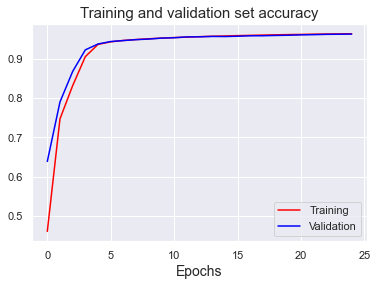

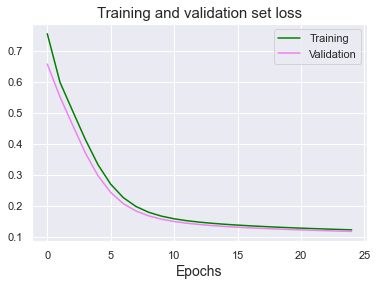

In [106]:
hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

In [107]:
y_predicted=nn_model.predict(x_train_scaled)
print(y_predicted)
print(len(y_predicted))

[[0.00244147]
 [0.9798071 ]
 [0.0064097 ]
 ...
 [0.9511602 ]
 [0.01590556]
 [0.02000472]]
35000


In [108]:
y_val_pred_cat = (np.asarray(y_predicted)).round()
y_val_pred_cat

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [109]:
from sklearn.metrics import f1_score
score0=f1_score(y_train, y_val_pred_cat)
print(score0)

0.9578597080821061


In [110]:
testnn1=test_NN(hist,x_test_scaled,y_test)
print(testnn1)

0.9622666835784912


In [111]:
score_f1.append(score0)
testing_ML.append(testnn1)

In [ ]:
#NICO

In [134]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,neuron_layer_2=5,optimizer='Adam')

Epoch 1/50
547/547 [==============================] - 1s 944us/step - loss: 0.6691 - accuracy: 0.7125 - val_loss: 0.6197 - val_accuracy: 0.7621
Epoch 2/50
547/547 [==============================] - 0s 862us/step - loss: 0.5758 - accuracy: 0.8020 - val_loss: 0.5330 - val_accuracy: 0.8275
Epoch 3/50
547/547 [==============================] - 0s 798us/step - loss: 0.4853 - accuracy: 0.8576 - val_loss: 0.4421 - val_accuracy: 0.8691
Epoch 4/50
547/547 [==============================] - 0s 789us/step - loss: 0.3963 - accuracy: 0.8918 - val_loss: 0.3595 - val_accuracy: 0.9007
Epoch 5/50
547/547 [==============================] - 0s 795us/step - loss: 0.3220 - accuracy: 0.9119 - val_loss: 0.2942 - val_accuracy: 0.9196
Epoch 6/50
547/547 [==============================] - 0s 795us/step - loss: 0.2662 - accuracy: 0.9274 - val_loss: 0.2459 - val_accuracy: 0.9317
Epoch 7/50
547/547 [==============================] - 0s 826us/step - loss: 0.2261 - accuracy: 0.9375 - val_loss: 0.2116 - val_accuracy:

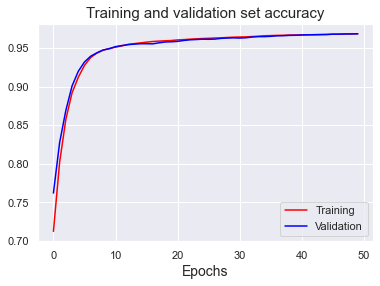

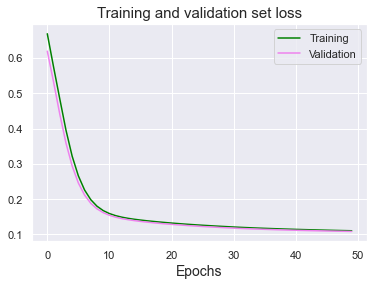

In [135]:
hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=50,plot_loss=True)

In [136]:
testnn=test_NN(hist,x_test_scaled,y_test)
print(testnn)

0.9670666456222534


The value of the area under the curve is:  0.9883714282571491


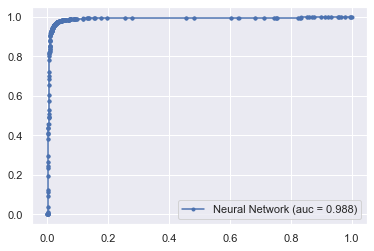

In [137]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = nn_model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

In [ ]:
#con dropout_prob= 0.5 is not good at all
#con dropout_prob= 0.5 is quite good

#con learning rate=0.01 non è così bello come con 0.0001 Why?
#con learning rate=0.001 non è così bello come con 0.0001 Why?
#con learning rate=0.0001 è bellissimo Why?
#con learning rate=0.00001 non è così bello come con 0.0001 Why?

#con 100 e 50 neuron layers non è comunque magnifico

#con learning_rate=0.01 e 100 e 50 neuroni per layer fa cagare
#con learning_rate=0.001 e 100 e 50 neuroni per layer fa cagare

In [69]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,neuron_layer_2=5,optimizer='RMSprop')

Epoch 1/25
547/547 [==============================] - 1s 984us/step - loss: 0.6731 - accuracy: 0.5600 - val_loss: 0.6394 - val_accuracy: 0.5659
Epoch 2/25
547/547 [==============================] - 0s 834us/step - loss: 0.6104 - accuracy: 0.5730 - val_loss: 0.5793 - val_accuracy: 0.6305
Epoch 3/25
547/547 [==============================] - 0s 794us/step - loss: 0.5455 - accuracy: 0.7810 - val_loss: 0.5133 - val_accuracy: 0.8672
Epoch 4/25
547/547 [==============================] - 0s 797us/step - loss: 0.4779 - accuracy: 0.8834 - val_loss: 0.4467 - val_accuracy: 0.8908
Epoch 5/25
547/547 [==============================] - 0s 803us/step - loss: 0.4117 - accuracy: 0.9021 - val_loss: 0.3837 - val_accuracy: 0.9081
Epoch 6/25
547/547 [==============================] - 0s 799us/step - loss: 0.3507 - accuracy: 0.9167 - val_loss: 0.3249 - val_accuracy: 0.9208
Epoch 7/25
547/547 [==============================] - 0s 802us/step - loss: 0.2946 - accuracy: 0.9293 - val_loss: 0.2723 - val_accuracy:

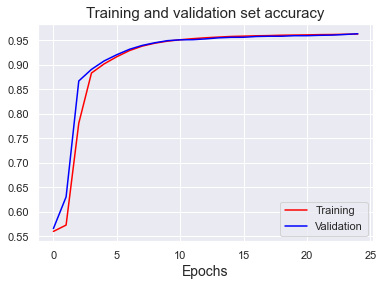

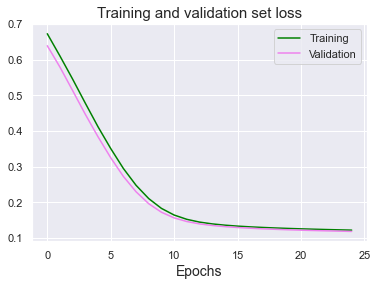

In [70]:
hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=25,plot_loss=True)

In [112]:
y_predictedRMS=nn_model.predict(x_train_scaled)
print(y_predictedRMS)
print(len(y_predictedRMS))

[[0.00244147]
 [0.9798071 ]
 [0.0064097 ]
 ...
 [0.9511602 ]
 [0.01590556]
 [0.02000472]]
35000


In [113]:
y_val_pred_catRMS = (np.asarray(y_predictedRMS)).round()
y_val_pred_catRMS

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [115]:
from sklearn.metrics import f1_score
score1=f1_score(y_train, y_val_pred_catRMS)
print(score1)

0.9578597080821061


In [116]:
testnn2=test_NN(hist,x_test_scaled,y_test)
print(testnn2)

0.9622666835784912


In [117]:
score_f1.append(score1)
testing_ML.append(testnn2)

The value of the area under the curve is:  0.986971996308707


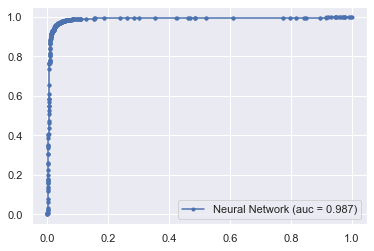

In [74]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = nn_model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

In [93]:
#Basic run of the neural network (using Stochastic Gradient Descent optimizer)

In [124]:
nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=25,neuron_layer_2=10,optimizer='SGD')

Epoch 1/50
547/547 [==============================] - 1s 931us/step - loss: 0.7342 - accuracy: 0.5605 - val_loss: 0.7216 - val_accuracy: 0.5660
Epoch 2/50
547/547 [==============================] - 0s 798us/step - loss: 0.7223 - accuracy: 0.5605 - val_loss: 0.7106 - val_accuracy: 0.5660
Epoch 3/50
547/547 [==============================] - 0s 768us/step - loss: 0.7116 - accuracy: 0.5605 - val_loss: 0.7006 - val_accuracy: 0.5660
Epoch 4/50
547/547 [==============================] - 0s 783us/step - loss: 0.7018 - accuracy: 0.5605 - val_loss: 0.6914 - val_accuracy: 0.5660
Epoch 5/50
547/547 [==============================] - 0s 764us/step - loss: 0.6927 - accuracy: 0.5605 - val_loss: 0.6830 - val_accuracy: 0.5663
Epoch 6/50
547/547 [==============================] - 0s 784us/step - loss: 0.6843 - accuracy: 0.5606 - val_loss: 0.6750 - val_accuracy: 0.5667
Epoch 7/50
547/547 [==============================] - 0s 763us/step - loss: 0.6764 - accuracy: 0.5609 - val_loss: 0.6676 - val_accuracy:

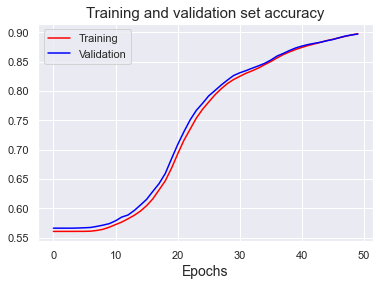

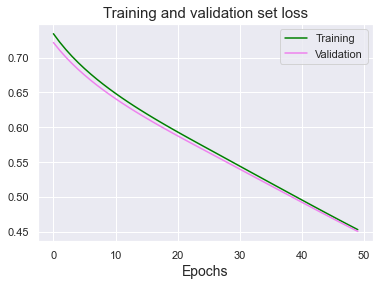

In [125]:
hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=64,
            num_epochs=50,plot_loss=True)

In [126]:
y_predictedSGD=nn_model.predict(x_train_scaled)
print(y_predictedSGD)
print(len(y_predictedSGD))

[[0.10197031]
 [0.58835185]
 [0.3436923 ]
 ...
 [0.5561764 ]
 [0.3618961 ]
 [0.21468523]]
35000


In [127]:
y_val_pred_catSGD = (np.asarray(y_predictedSGD)).round()
y_val_pred_catSGD

array([[0.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [128]:
from sklearn.metrics import f1_score
score2=f1_score(y_train, y_val_pred_catSGD)
print(score2)

0.8773188055996138


In [129]:
testnn3=test_NN(hist,x_test_scaled,y_test)
print(testnn3)

0.8899999856948853


In [130]:
score_f1.append(score2)
testing_ML.append(testnn3)

The value of the area under the curve is:  0.9569733654912731


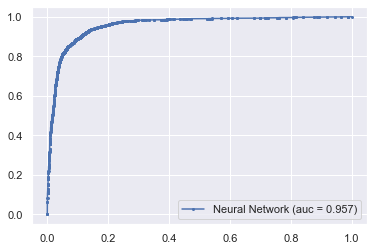

In [84]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = nn_model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.',ms=4, label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

In [132]:
tested=np.array(testing_ML)
f1=np.array(score_f1)

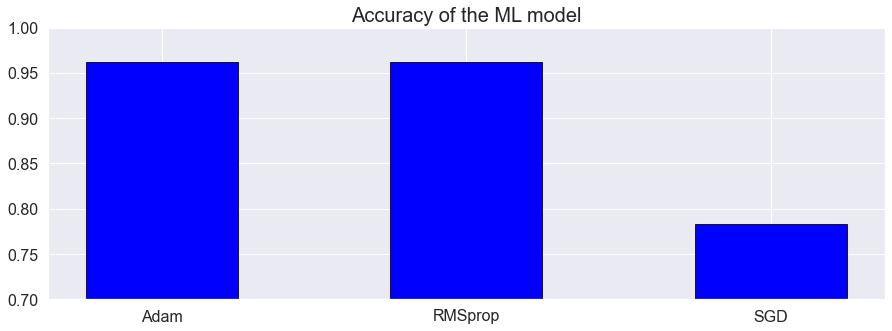

In [131]:
plt.figure(figsize=(15,5))
plt.title("Accuracy of the ML model",fontsize=20)
plt.bar(x=['Adam','RMSprop','SGD'],
        height=tested,width=0.5,color='blue',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.7,1)
plt.show()

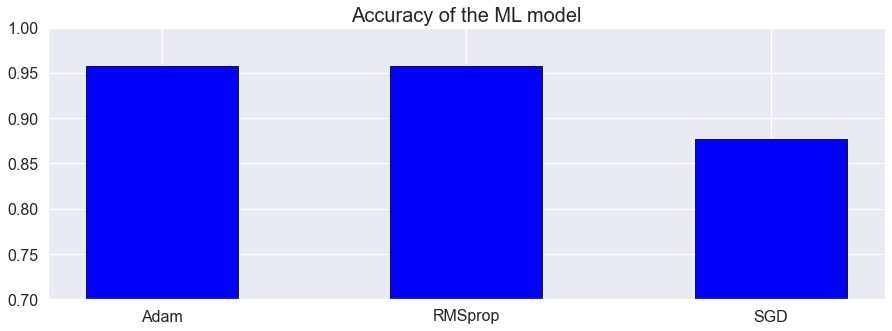

In [133]:
plt.figure(figsize=(15,5))
plt.title("Accuracy of the ML model",fontsize=20)
plt.bar(x=['Adam','RMSprop','SGD'],
        height=f1,width=0.5,color='blue',edgecolor='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0.7,1)
plt.show()

In [48]:
#Varying hyperparameter - number of neurons per layer? How many epochs should we run for?

In [49]:
#qui ho messo una cosa dall'altro file

In [49]:
train_acc_n=[]
val_acc_n=[]

val_range=(10,100,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=0.02,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='SGD')
    hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=100,plot_loss=False)
    
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
    
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")
    

Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 20
Done for number of neurons (each hidden layer): 30
Done for number of neurons (each hidden layer): 40
Done for number of neurons (each hidden layer): 50
Done for number of neurons (each hidden layer): 60
Done for number of neurons (each hidden layer): 70
Done for number of neurons (each hidden layer): 80
Done for number of neurons (each hidden layer): 90


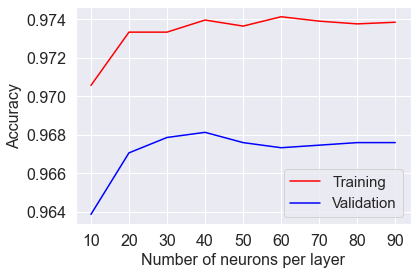

In [50]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

In [52]:
#Learning rate

In [53]:
import time
train_acc_lr=[]
val_acc_lr=[]

val_range=(-40,-10,1)
lr_range=[]
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    lr=10**(i/10.0)
    lr_range.append(lr)
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.1,learning_rate=lr,
                      neuron_layer_1=100,neuron_layer_2=100,optimizer='SGD')
    hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=100,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_lr.append(acc_train)
    val_acc_lr.append(acc_val)
    t2=time.time()
    print(f"Done for learning rate: {lr}. Time took {round((t2-t1),2)} seconds")

Done for learning rate: 0.0001. Time took 17.6 seconds
Done for learning rate: 0.00012589254117941674. Time took 17.52 seconds
Done for learning rate: 0.00015848931924611142. Time took 17.5 seconds
Done for learning rate: 0.00019952623149688788. Time took 17.53 seconds
Done for learning rate: 0.00025118864315095795. Time took 17.62 seconds
Done for learning rate: 0.00031622776601683794. Time took 17.59 seconds
Done for learning rate: 0.00039810717055349735. Time took 17.47 seconds
Done for learning rate: 0.0005011872336272725. Time took 17.69 seconds
Done for learning rate: 0.000630957344480193. Time took 17.75 seconds
Done for learning rate: 0.0007943282347242813. Time took 17.45 seconds
Done for learning rate: 0.001. Time took 17.48 seconds
Done for learning rate: 0.0012589254117941675. Time took 17.69 seconds
Done for learning rate: 0.001584893192461114. Time took 17.91 seconds
Done for learning rate: 0.001995262314968879. Time took 17.58 seconds
Done for learning rate: 0.0025118864

In [55]:
lr_range

[0.0001,
 0.00012589254117941674,
 0.00015848931924611142,
 0.00019952623149688788,
 0.00025118864315095795,
 0.00031622776601683794,
 0.00039810717055349735,
 0.0005011872336272725,
 0.000630957344480193,
 0.0007943282347242813,
 0.001,
 0.0012589254117941675,
 0.001584893192461114,
 0.001995262314968879,
 0.0025118864315095794,
 0.0031622776601683794,
 0.003981071705534973,
 0.005011872336272725,
 0.00630957344480193,
 0.007943282347242814,
 0.01,
 0.012589254117941675,
 0.015848931924611134,
 0.0199526231496888,
 0.025118864315095794,
 0.03162277660168379,
 0.039810717055349734,
 0.05011872336272722,
 0.06309573444801933,
 0.07943282347242814]

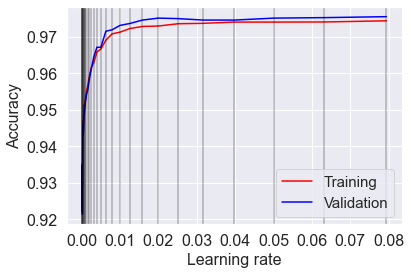

In [58]:
plt.plot(lr_range,train_acc_lr,c='red')
plt.plot(lr_range,val_acc_lr,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Learning rate", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
for i in range(len(lr_range)):
    plt.axvline(x=lr_range[i], ymin=0, ymax=1, color='black',linewidth=0.4)
#plt.ylim(0.0,0.9)
plt.show()

In [59]:
#How to improve neural network performance?

In [174]:
model = Sequential()
model.add(Dense(100, input_shape=(input_dim,),activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='selu'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='selu'))
model.add(Dropout(0.1))
# sigmoid activation for the last layer for classification
model.add(Dense(1, activation='sigmoid'))

#Optimizer
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001) #era 0.01 (con 0.001 lavora molto meglio)

model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [151]:
model.layers

In [152]:
model.inputs

[<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'dense_213_input')>]

In [153]:
model.outputs

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_216')>]

In [154]:
model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_213 (Dense)           (None, 100)               700       
                                                                 
 dropout_142 (Dropout)       (None, 100)               0         
                                                                 
 dense_214 (Dense)           (None, 100)               10100     
                                                                 
 dropout_143 (Dropout)       (None, 100)               0         
                                                                 
 dense_215 (Dense)           (None, 50)                5050      
                                                                 
 dropout_144 (Dropout)       (None, 50)                0         
                                                                 
 dense_216 (Dense)           (None, 1)               

Epoch 1/400
137/137 [==============================] - 1s 3ms/step - loss: 0.1772 - accuracy: 0.9397 - val_loss: 0.1369 - val_accuracy: 0.9565
Epoch 2/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1416 - accuracy: 0.9552 - val_loss: 0.1213 - val_accuracy: 0.9625
Epoch 3/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9609 - val_loss: 0.1145 - val_accuracy: 0.9663
Epoch 4/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1233 - accuracy: 0.9631 - val_loss: 0.1122 - val_accuracy: 0.9673
Epoch 5/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1184 - accuracy: 0.9645 - val_loss: 0.1042 - val_accuracy: 0.9708
Epoch 6/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9651 - val_loss: 0.1038 - val_accuracy: 0.9701
Epoch 7/400
137/137 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9673 - val_loss: 0.1001 - val_accuracy: 0.9715

Epoch 58/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9735 - val_loss: 0.0769 - val_accuracy: 0.9720
Epoch 59/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0750 - accuracy: 0.9739 - val_loss: 0.0757 - val_accuracy: 0.9737
Epoch 60/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9735 - val_loss: 0.0757 - val_accuracy: 0.9731
Epoch 61/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9741 - val_loss: 0.0760 - val_accuracy: 0.9720
Epoch 62/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9741 - val_loss: 0.0754 - val_accuracy: 0.9731
Epoch 63/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9736 - val_loss: 0.0763 - val_accuracy: 0.9721
Epoch 64/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9736 - val_loss: 0.0751 - val_accuracy:

Epoch 115/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9751 - val_loss: 0.0736 - val_accuracy: 0.9736
Epoch 116/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9744 - val_loss: 0.0742 - val_accuracy: 0.9732
Epoch 117/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9750 - val_loss: 0.0746 - val_accuracy: 0.9732
Epoch 118/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9752 - val_loss: 0.0742 - val_accuracy: 0.9731
Epoch 119/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9750 - val_loss: 0.0741 - val_accuracy: 0.9732
Epoch 120/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9749 - val_loss: 0.0746 - val_accuracy: 0.9724
Epoch 121/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9751 - val_loss: 0.0743 - val_ac

137/137 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9754 - val_loss: 0.0708 - val_accuracy: 0.9732
Epoch 228/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9762 - val_loss: 0.0705 - val_accuracy: 0.9739
Epoch 229/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9754 - val_loss: 0.0708 - val_accuracy: 0.9732
Epoch 230/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9753 - val_loss: 0.0702 - val_accuracy: 0.9747
Epoch 231/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9761 - val_loss: 0.0705 - val_accuracy: 0.9744
Epoch 232/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9761 - val_loss: 0.0711 - val_accuracy: 0.9744
Epoch 233/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9759 - val_loss: 0.0713 - val_accuracy: 0.9733

137/137 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9771 - val_loss: 0.0700 - val_accuracy: 0.9743
Epoch 340/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9763 - val_loss: 0.0700 - val_accuracy: 0.9751
Epoch 341/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9767 - val_loss: 0.0698 - val_accuracy: 0.9736
Epoch 342/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9764 - val_loss: 0.0691 - val_accuracy: 0.9751
Epoch 343/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.9768 - val_loss: 0.0691 - val_accuracy: 0.9741
Epoch 344/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0623 - accuracy: 0.9766 - val_loss: 0.0694 - val_accuracy: 0.9745
Epoch 345/400
137/137 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9769 - val_loss: 0.0692 - val_accuracy: 0.9743

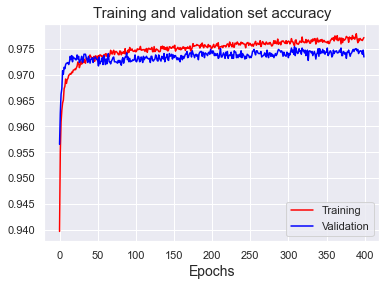

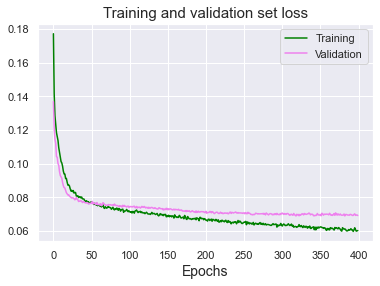

In [172]:
hist=run_NN(model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=400,plot_loss=True)

In [173]:
test_nn2_0=test_NN(hist,x_test_scaled,y_test)
print(test_nn2_0)

0.9778666496276855


Epoch 1/200
137/137 [==============================] - 1s 3ms/step - loss: 0.1779 - accuracy: 0.9387 - val_loss: 0.1373 - val_accuracy: 0.9552
Epoch 2/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9558 - val_loss: 0.1207 - val_accuracy: 0.9628
Epoch 3/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9612 - val_loss: 0.1133 - val_accuracy: 0.9659
Epoch 4/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9637 - val_loss: 0.1059 - val_accuracy: 0.9703
Epoch 5/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9652 - val_loss: 0.1040 - val_accuracy: 0.9699
Epoch 6/200
137/137 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9658 - val_loss: 0.1048 - val_accuracy: 0.9692
Epoch 7/200
137/137 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9667 - val_loss: 0.0995 - val_accuracy: 0.9709

Epoch 58/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0761 - accuracy: 0.9735 - val_loss: 0.0757 - val_accuracy: 0.9723
Epoch 59/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9739 - val_loss: 0.0751 - val_accuracy: 0.9733
Epoch 60/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9737 - val_loss: 0.0757 - val_accuracy: 0.9725
Epoch 61/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9738 - val_loss: 0.0749 - val_accuracy: 0.9733
Epoch 62/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9739 - val_loss: 0.0751 - val_accuracy: 0.9732
Epoch 63/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9740 - val_loss: 0.0756 - val_accuracy: 0.9728
Epoch 64/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9744 - val_loss: 0.0750 - val_accuracy:

Epoch 115/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 0.9750 - val_loss: 0.0731 - val_accuracy: 0.9740
Epoch 116/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9745 - val_loss: 0.0743 - val_accuracy: 0.9717
Epoch 117/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9751 - val_loss: 0.0731 - val_accuracy: 0.9724
Epoch 118/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9749 - val_loss: 0.0731 - val_accuracy: 0.9732
Epoch 119/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9752 - val_loss: 0.0721 - val_accuracy: 0.9745
Epoch 120/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9746 - val_loss: 0.0727 - val_accuracy: 0.9728
Epoch 121/200
137/137 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9748 - val_loss: 0.0722 - val_ac

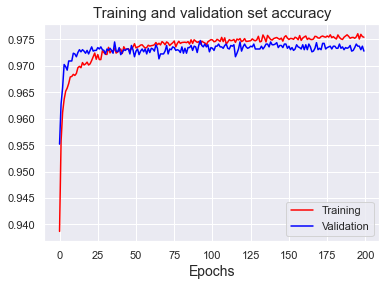

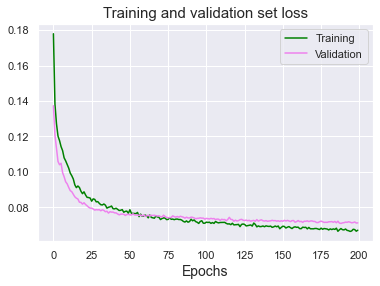

In [160]:
hist=run_NN(model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=200,plot_loss=True)

In [161]:
test_nn2_1=test_NN(hist,x_test_scaled,y_test)
print(test_nn2_1)

0.9769333600997925


The value of the area under the curve is:  0.9963453463203464


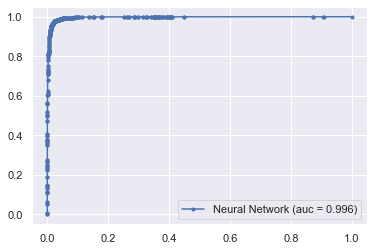

In [137]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

Epoch 1/100
137/137 [==============================] - 1s 3ms/step - loss: 0.1710 - accuracy: 0.9450 - val_loss: 0.1407 - val_accuracy: 0.9557
Epoch 2/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.9545 - val_loss: 0.1244 - val_accuracy: 0.9624
Epoch 3/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1291 - accuracy: 0.9609 - val_loss: 0.1145 - val_accuracy: 0.9657
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.9639 - val_loss: 0.1070 - val_accuracy: 0.9685
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9652 - val_loss: 0.1042 - val_accuracy: 0.9705
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9661 - val_loss: 0.0998 - val_accuracy: 0.9708
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 0.1090 - accuracy: 0.9679 - val_loss: 0.0992 - val_accuracy: 0.9707

Epoch 58/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0767 - accuracy: 0.9733 - val_loss: 0.0750 - val_accuracy: 0.9733
Epoch 59/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9735 - val_loss: 0.0751 - val_accuracy: 0.9737
Epoch 60/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9738 - val_loss: 0.0758 - val_accuracy: 0.9731
Epoch 61/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9739 - val_loss: 0.0762 - val_accuracy: 0.9723
Epoch 62/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9739 - val_loss: 0.0754 - val_accuracy: 0.9727
Epoch 63/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9743 - val_loss: 0.0751 - val_accuracy: 0.9743
Epoch 64/100
137/137 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9738 - val_loss: 0.0753 - val_accuracy:

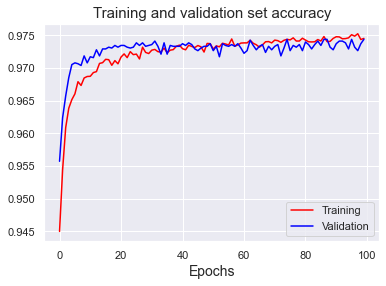

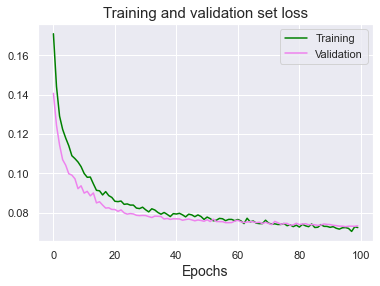

In [163]:
hist=run_NN(model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=100,plot_loss=True)

In [164]:
test_nn2_2=test_NN(hist,x_test_scaled,y_test)
print(test_nn2_2)

0.9754666686058044


The value of the area under the curve is:  0.996361571011076


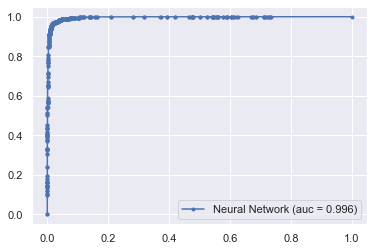

In [165]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

In [ ]:
#10 EPOCH SEEMS TO BE GOOD AND DO NOT OVERFIT

Epoch 1/50
137/137 [==============================] - 1s 3ms/step - loss: 0.1839 - accuracy: 0.9348 - val_loss: 0.1330 - val_accuracy: 0.9579
Epoch 2/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1374 - accuracy: 0.9567 - val_loss: 0.1176 - val_accuracy: 0.9640
Epoch 3/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1280 - accuracy: 0.9620 - val_loss: 0.1129 - val_accuracy: 0.9669
Epoch 4/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1218 - accuracy: 0.9645 - val_loss: 0.1105 - val_accuracy: 0.9675
Epoch 5/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1176 - accuracy: 0.9656 - val_loss: 0.1053 - val_accuracy: 0.9699
Epoch 6/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9664 - val_loss: 0.1063 - val_accuracy: 0.9687
Epoch 7/50
137/137 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9664 - val_loss: 0.1013 - val_accuracy: 0.9709
Epoch 

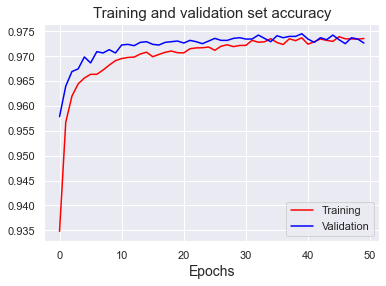

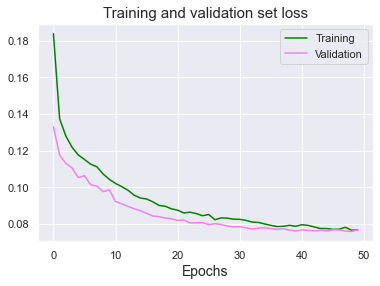

In [175]:
hist=run_NN(model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=1,batch_size=256,
            num_epochs=50,plot_loss=True)

In [176]:
test_nn2_3=test_NN(hist,x_test_scaled,y_test)
print(test_nn2_3)

0.9766666889190674


the value of the area under the curve is:  0.9958993145743147


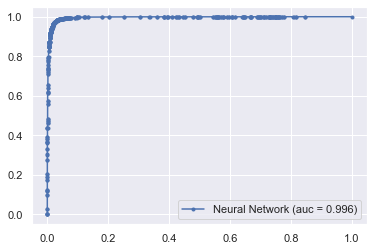

In [129]:
from sklearn.metrics import roc_curve, auc
y_pred_nn = model.predict(x_val_scaled).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.legend()
print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

In [64]:
#Running for num_epochs = 5

In [65]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=5,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


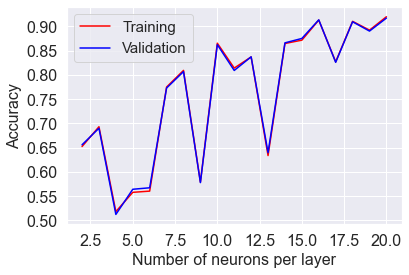

In [66]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

In [67]:
#Running for num_epochs = 10

In [68]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=10,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


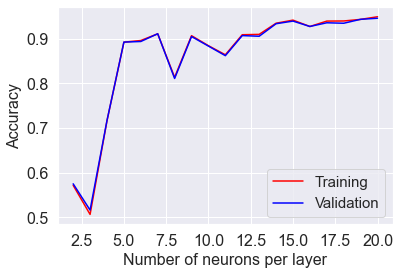

In [69]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

In [70]:
#Running for num_epochs = 25

In [71]:
train_acc_n=[]
val_acc_n=[]

val_range=(2,21,1)
for i in range(val_range[0],val_range[1],val_range[2]):
    # Fitting
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=i,neuron_layer_2=i,optimizer='Adam')
    hist=run_NN(nn_model,x_train_scaled,y_train,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_scaled, y_train,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
   # Appending to the lists
    train_acc_n.append(acc_train)
    val_acc_n.append(acc_val)
    print(f"Done for number of neurons (each hidden layer): {i}")

Done for number of neurons (each hidden layer): 2
Done for number of neurons (each hidden layer): 3
Done for number of neurons (each hidden layer): 4
Done for number of neurons (each hidden layer): 5
Done for number of neurons (each hidden layer): 6
Done for number of neurons (each hidden layer): 7
Done for number of neurons (each hidden layer): 8
Done for number of neurons (each hidden layer): 9
Done for number of neurons (each hidden layer): 10
Done for number of neurons (each hidden layer): 11
Done for number of neurons (each hidden layer): 12
Done for number of neurons (each hidden layer): 13
Done for number of neurons (each hidden layer): 14
Done for number of neurons (each hidden layer): 15
Done for number of neurons (each hidden layer): 16
Done for number of neurons (each hidden layer): 17
Done for number of neurons (each hidden layer): 18
Done for number of neurons (each hidden layer): 19
Done for number of neurons (each hidden layer): 20


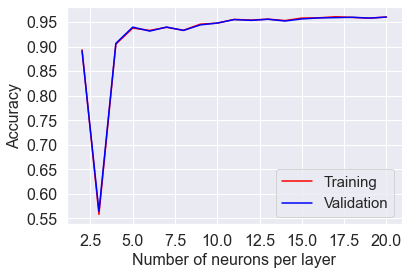

In [72]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_n,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_n,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Number of neurons per layer", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.0,0.9)
plt.show()

In [73]:
#LEARNING CURVE: Varying training set size

Done for: 10% training set size. Took 1.78 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.7129999995231628
Testing the validation with the actual percentage of data the evaluation parameter is: 0.7205333113670349
Done for: 20% training set size. Took 2.02 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.6621999740600586
Testing the validation with the actual percentage of data the evaluation parameter is: 0.6550666689872742
Done for: 30% training set size. Took 2.34 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.8065999746322632
Testing the validation with the actual percentage of data the evaluation parameter is: 0.8054666519165039
Done for: 40% training set size. Took 2.89 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.8669499754905701
Testing the validation with the actual percentage of data 

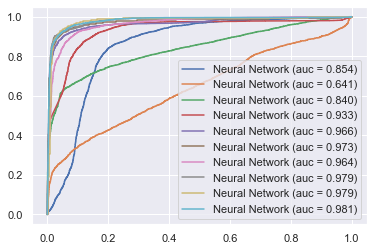

In [148]:
import time
val_acc_train_size=[]
train_acc_train_size=[]
test_acc_train_size=[]
time_sampling=[]

val_range=(10,101,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    percentage=i*0.01
    # Sampling
    df_sampled = data.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')
    hist=run_NN(nn_model,x_train_sampled,y_train_sampled,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
    acc_test=hist.model.evaluate(x_test_scaled,y_test,verbose=0)[1]
    
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    test_acc_train_size.append(acc_test)
    
    t2=time.time()
    time_sampling.append(t2-t1)
    print(f"Done for: {i}% training set size. Took {round((t2-t1),2)} seconds.")
    
    
    
    print(f"Testing the training with the actual percentage of data the evaluation parameter is: {acc_train}")
    print(f"Testing the validation with the actual percentage of data the evaluation parameter is: {acc_val}")
    
    from sklearn.metrics import roc_curve, auc
    y_pred_nn = nn_model.predict(x_val_scaled).ravel()
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras, label='Neural Network (auc = %0.3f)' % auc_keras)
    plt.legend()
    #print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

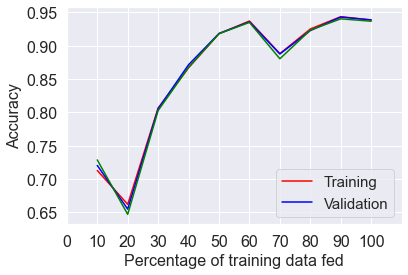

In [149]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.plot(range(val_range[0],val_range[1],val_range[2]),test_acc_train_size,c='green')
plt.legend(["Training","Validation","Testing"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.8,0.9)
plt.xlim(0,110)
plt.show()

In [76]:
#To smooth out the dependence on training set size, can we tweak the learning rate?

In [144]:
val_acc_train_size=[]
train_acc_train_size=[]
test_acc_train_size=[]

val_range=(10,101,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    percentage=i*0.01
    # Sampling
    df_sampled = data.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.001,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')
    hist=run_NN(nn_model,x_train_sampled,y_train_sampled,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
    acc_test=hist.model.evaluate(x_test_scaled,y_test,verbose=0)[1]
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    test_acc_train_size.append(acc_test)
    
    print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


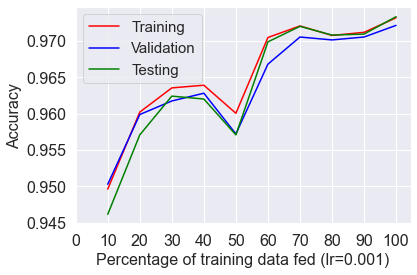

In [145]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.plot(range(val_range[0],val_range[1],val_range[2]),test_acc_train_size,c='green')
plt.legend(["Training","Validation","Testing"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed (lr=0.001)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.5,0.9)
#plt.xlim(0,110)
plt.show()

In [ ]:
#Even more high the learning rate

In [142]:
val_acc_train_size=[]
train_acc_train_size=[]
test_acc_train_size=[]

val_range=(10,101,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    percentage=i*0.01
    # Sampling
    df_sampled = data.sample(frac=percentage)
    x_train_sampled=df_sampled.drop('id',axis=1)
    y_train_sampled=df_sampled['id']
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.01,
                      neuron_layer_1=5,neuron_layer_2=5,optimizer='Adam')
    hist=run_NN(nn_model,x_train_sampled,y_train_sampled,x_val_scaled,y_val,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_scaled,y_val,verbose=0)[1]
    acc_test=hist.model.evaluate(x_test_scaled,y_test,verbose=0)[1]
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    test_acc_train_size.append(acc_test)
    
    print(f"Done for: {i}% training set size")

Done for: 10% training set size
Done for: 20% training set size
Done for: 30% training set size
Done for: 40% training set size
Done for: 50% training set size
Done for: 60% training set size
Done for: 70% training set size
Done for: 80% training set size
Done for: 90% training set size
Done for: 100% training set size


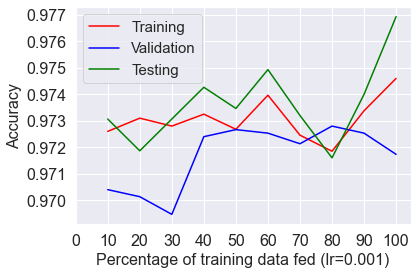

In [143]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.plot(range(val_range[0],val_range[1],val_range[2]),test_acc_train_size,c='green')
plt.legend(["Training","Validation","Testing"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed (lr=0.001)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.5,0.9)
#plt.xlim(0,110)
plt.show()

In [ ]:
#NICO

Shape of validation set: (750, 6)
Shape of test set: (750, 6)
Shape of training set: (3500, 6)
Done for: 10% training set size. Took 1.21 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.8611428737640381
Testing the validation with the actual percentage of data the evaluation parameter is: 0.8706666827201843
Shape of validation set: (1500, 6)
Shape of test set: (1500, 6)
Shape of training set: (7000, 6)
Done for: 20% training set size. Took 1.43 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.7532857060432434
Testing the validation with the actual percentage of data the evaluation parameter is: 0.7526666522026062
Shape of validation set: (2250, 6)
Shape of test set: (2250, 6)
Shape of training set: (10500, 6)
Done for: 30% training set size. Took 1.74 seconds.
Testing the training with the actual percentage of data the evaluation parameter is: 0.8994285464286804
Testing the validation with th

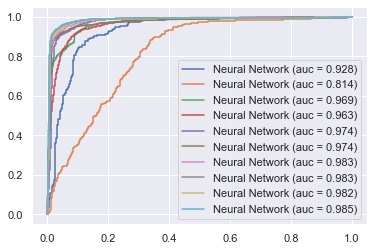

In [127]:
import time
val_acc_train_size=[]
train_acc_train_size=[]
time_sampling=[]

val_range=(10,101,10)
for i in range(val_range[0],val_range[1],val_range[2]):
    t1=time.time()
    percentage=i*0.01
    # Sampling
    df_sampled = data.sample(frac=percentage)
    yy=df_sampled.id
    xx=df_sampled.drop('id',axis=1)
    
    x_train_sampled, x_test_sampled, y_train_sampled, y_test_sampled = train_test_split(xx, yy, test_size=0.30)
    x_test_sampled, x_val_sampled, y_test_sampled, y_val_sampled = train_test_split(x_test_sampled, y_test_sampled, test_size=0.50)
    print("Shape of validation set:", x_val_sampled.shape)
    print("Shape of test set:", x_test_sampled.shape)
    print("Shape of training set:", x_train_sampled.shape)
    
    
    x_train_sampled=StandardScaler().fit_transform(x_train_sampled)
    x_test_sampled=StandardScaler().fit_transform(x_test_sampled)
    x_val_sampled=StandardScaler().fit_transform(x_val_sampled)
    # Fitting and Predictions
    nn_model=make_NN_model(input_dim=input_dim,num_classes=num_classes,dropout_prob=0.0,learning_rate=0.0001,
                      neuron_layer_1=10,neuron_layer_2=15,optimizer='Adam')
    hist=run_NN(nn_model,x_train_sampled,y_train_sampled,x_val_sampled,y_val_sampled,verbosity=0,batch_size=256,
            num_epochs=25,plot_loss=False)
    
    # Accuracy score
    acc_train=hist.model.evaluate(x_train_sampled, y_train_sampled,verbose=0)[1]
    acc_val=hist.model.evaluate(x_val_sampled,y_val_sampled,verbose=0)[1]
    
   # Appending to the lists
    train_acc_train_size.append(acc_train)
    val_acc_train_size.append(acc_val)
    
    t2=time.time()
    time_sampling.append(t2-t1)
    print(f"Done for: {i}% training set size. Took {round((t2-t1),2)} seconds.")
    
    
    
    print(f"Testing the training with the actual percentage of data the evaluation parameter is: {acc_train}")
    print(f"Testing the validation with the actual percentage of data the evaluation parameter is: {acc_val}")
    
    from sklearn.metrics import roc_curve, auc
    y_pred_nn = nn_model.predict(x_val_sampled).ravel()
    nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val_sampled, y_pred_nn)
#y_val era y_test, ma credo che il df era diviso solo in train e test
#con y_val da una retta tra 0 e 1, quindi come se fossero completamente decorrelati
#con y_test invece più i meno funziona
#ERA UN  PROBLEMA DI COERENZA, PERCHE ANCHE y_pred_nn era con test, se entrambi sono con lo stesso nome funziona
#INOLTRE FUNZIONA ANCORA MEGLIO USANDO IL DATASET x_val_scaled!!!
    auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
    plt.plot(nn_fpr_keras, nn_tpr_keras, label='Neural Network (auc = %0.3f)' % auc_keras)
    plt.legend()
    #print("The value of the area under the curve is: ",auc_keras)

#y_test=y_val
#y_pred = model.predict(x_test).ravel()

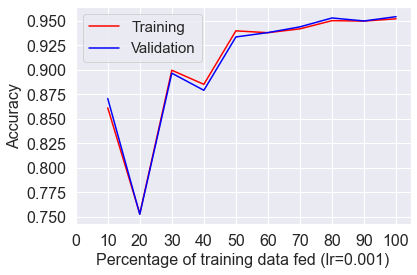

In [128]:
plt.plot(range(val_range[0],val_range[1],val_range[2]),train_acc_train_size,c='red')
plt.plot(range(val_range[0],val_range[1],val_range[2]),val_acc_train_size,c='blue')
plt.legend(["Training","Validation"],fontsize=15)
plt.grid(True)
plt.xticks(np.arange(0, 110, step=10),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Percentage of training data fed (lr=0.001)", fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
#plt.ylim(0.5,0.9)
#plt.xlim(0,110)
plt.show()

In [ ]:
#fit() serve per addestrare il modello con gli input dati.

#predict() è per la previsione effettiva. Genera previsioni di output per i campioni di input.

#evaluate() serve per valutare il modello già addestrato. Restituisce il valore di perdita e i 
#valori delle metriche per il modello.

In [ ]:
#Overfitting is easy to diagnose with the accuracy visualizations you have available. 
#If "Accuracy" (measured against the training set) is very good and "Validation Accuracy" 
#(measured against a validation set) is not as good, then your model is overfitting.

In [ ]:
#Underfitting is the opposite counterpart of overfitting wherein your model exhibits high bias. 
#This situation can occur when your model is not sufficiently complex to capture the relationship between 
#features and labels (or if your model is too strictly regularized).
#Underfitting is a bit harder to diagnose. If Accuracy and Validation Accuracy are similar but are both poor, 
#then you may be underfitting.

In [ ]:
#You can combat overfitting by reducing the complexity of your model 
#(i.e. reducing the number of trainable parameters). 
#The specifics of how this is accomplished vary depending on the learning algorithm and the domain.

#For neural networks, you can use fewer layers (shallower networks), 
#fewer neurons per layer, sparser connections between the layers (as in convolutional nets), 
#or regularization techniques like dropout.



In [ ]:
#If your network is overfitting, adding more layers will almost certainly make the problem worse, 
#since you're increasing model complexity. If your network is underfitting, adding more layers can help, 
#but it's rarely so straightforward. You need to think carefully about how you expect the network to operate 
#and what strategies you can employ to ensure that it doesn't begin to overfit.

In [ ]:
#If the performance of the model on the training dataset is significantly better than the performance 
#on the test dataset, then the model may have overfit the training dataset.

In [ ]:
#A plot of the model performance on the train and test set can be calculated at each point during training 
#and plots can be created. This plot is often called a learning curve plot, showing one curve for model
#performance on the training set and one curve for the test set for each increment of learning.

In [ ]:
#The common pattern for overfitting can be seen on learning curve plots, where model performance on 
#the training dataset continues to improve (e.g. loss or error continues to fall or accuracy continues to rise)
#and performance on the test or validation set improves to a point and then begins to get worse.

In [ ]:
#The problem with overfitting, is that the more specialized the model becomes to training data, 
#the less well it is able to generalize to new data, resulting in an increase in generalization error. 
#This increase in generalization error can be measured by the performance of the model on the validation dataset.

In [ ]:
#A good fit is identified by a training and validation loss that decreases to a point of stability with 
#a minimal gap between the two final loss values.